<a href="https://colab.research.google.com/github/Deepak-Sathyanarayanan/twitter_sentiment_analysis/blob/master/01_analyzingTwitterDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Mounting Drive to this notebook

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


#### Importing the required Libraries

In [2]:
# pandas
import pandas as pd

# counter
from collections import Counter

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# ssl
import ssl

# nltk
import nltk
from nltk.corpus import stopwords

#### Importing dataset from google drive

In [3]:
path = '/content/gdrive/My Drive/Colab Notebooks/Sentiment_Analysis_Capstone_3/sentiment140_train.csv'
df = pd.read_csv(path, encoding ="ISO-8859-1" , names=["target", "ids", "date", "flag", "user", "text"])

In [4]:
df.head(5) 

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


#### Mapping Labels to Numbers

In [5]:
decode_mapping = {0: "NEGATIVE", 4: "POSITIVE"}

def decode_sentiment(x):
    return decode_mapping[int(x)]


df['target'] = df['target'].apply(lambda x: decode_sentiment(x))

In [6]:
df.head()

,target,ids,date,flag,user,text
0,NEGATIVE,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,NEGATIVE,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,NEGATIVE,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,NEGATIVE,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,NEGATIVE,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


#### Bar Plot between the labels

Text(0.5, 1.0, 'Dataset labels distribuition')

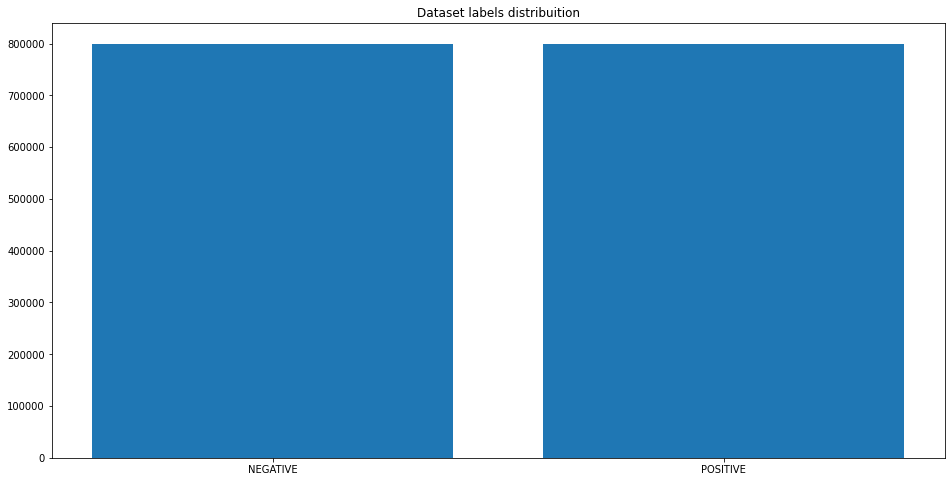

In [7]:
target_cnt = Counter(df['target'])

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

In [8]:
df['target'].value_counts()

POSITIVE    800000
NEGATIVE    800000
Name: target, dtype: int64

#### Number of Words in each tweeet

In [9]:
df['wordCount'] = df['text'].apply(lambda x: len(str(x).split(" ")))
df[['text','wordCount']].head()

,text,wordCount
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",20
1,is upset that he can't update his Facebook by ...,22
2,@Kenichan I dived many times for the ball. Man...,19
3,my whole body feels itchy and like its on fire,11
4,"@nationwideclass no, it's not behaving at all....",22


#### Number of characters in each tweet

In [10]:
df['char_count'] = df['text'].str.len()
df[['text','char_count']].head()

,text,char_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,is upset that he can't update his Facebook by ...,111
2,@Kenichan I dived many times for the ball. Man...,89
3,my whole body feels itchy and like its on fire,47
4,"@nationwideclass no, it's not behaving at all....",111


#### Average Word Size

In [11]:
%%time

def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['text'].apply(lambda x: avg_word(x))
df[['text','avg_word']].head()

CPU times: user 4.34 s, sys: 61.2 ms, total: 4.4 s
Wall time: 4.41 s


##### To understand the above cell

In [12]:
sample_sentence = "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"
print("sample_sentence: ",sample_sentence)
print('\n')

words = sample_sentence.split()
print("split by space: ",words)
print('\n')

len_of_words = len(words)
print("length of the list (words): ", len_of_words)
print('\n')

word_char_len = [len(x) for x in words]
print("word character length: ", word_char_len)
print('\n')

sum_of_len_of_words = sum(word_char_len)
print("sum of word_length: ",sum_of_len_of_words)
print('\n')

avg = sum_of_len_of_words/len_of_words
print("avg word length: ", avg)
print('\n')

sample_sentence:  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D


split by space:  ['@switchfoot', 'http://twitpic.com/2y1zl', '-', 'Awww,', "that's", 'a', 'bummer.', 'You', 'shoulda', 'got', 'David', 'Carr', 'of', 'Third', 'Day', 'to', 'do', 'it.', ';D']


length of the list (words):  19


word character length:  [11, 24, 1, 5, 6, 1, 7, 3, 7, 3, 5, 4, 2, 5, 3, 2, 2, 3, 2]


sum of word_length:  96


avg word length:  5.052631578947368




#### Download Stopwords

In [13]:
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

#### Check the number of stopwords in each tweet

In [14]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['text','stopwords']].head()

,text,stopwords
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",4
1,is upset that he can't update his Facebook by ...,8
2,@Kenichan I dived many times for the ball. Man...,5
3,my whole body feels itchy and like its on fire,4
4,"@nationwideclass no, it's not behaving at all....",10


#####  To understand the data - Looking at stopwords in 1st sentence

In [15]:
[i for i in df['text'][0].split() if i in stop]

['a', 'of', 'to', 'do']

#### Number of hashtags in a tweet

In [16]:
df['hastags'] = df['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df[['text','hastags']].head()

,text,hastags
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


##### Looking at the data

In [17]:
df['hastags'].value_counts()
df['hastags'][df['hastags'] == 24]
df['text'][715830]

'#BTS is fallin!!   #BTS #BTS #BTS #BTS #BTS #BTS #BTS #BTS #BTS #BTS #BTS #BTS #BTS #BTS #BTS #BTS #BTS #BTS #BTS #BTS #BTS #BTS #BTS'

#### Number of '@' symbols in the tweets

In [18]:
df['atSign'] = df['text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
df[['text','atSign']].head()

,text,atSign
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",1
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,1
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",1


##### To understand the above cell - Looking at the data

In [19]:
df['atSign'].value_counts()
df['atSign'][df['atSign'] == 12]
df['text'][1007078]

'thanks!! @tzatz  #followfriday @penlix @tf_twits @pviktor @zoofo @than_antho @cpil @twistingaether @hugobrown @marcthom @winzy @sarahwong'

#### Number of digits in the tweets

In [20]:
df['numerics'] = df['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['text','numerics']].head()

,text,numerics
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


##### To understand the above cell - Looking at the data

In [21]:
df['numerics'].value_counts()
df['numerics'][df['numerics'] == 13]
df['text'][1234797]

'@EDouglasWW  you into hex at all? 6d 61 79 62 65 20 69 27 6d 20 61 20 72 6f 62 6f 74'

#### Number of upper case letters in tweets

In [22]:
df['upper'] = df['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[['text','upper']].head()

,text,upper
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",1
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,1
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",1


##### To understand the above cell - Looking into the data

In [23]:
df['upper'].value_counts()
df['upper'][df['upper'] == 40]
df['text'][981534]

'@ajayrochester DO IT DO IT DO IT DO IT DO IT DO IT DO IT DO IT DO IT DO IT DO IT DO IT DO IT DO IT DO IT DO IT DO IT DO IT DO IT DO IT '